# math包中的数学函数

In [1]:
import math

In [144]:
a=dir(math)
b=dict(
    triangle=['acos',
     'acosh',
     'asin',
     'asinh',
     'atan',
     'atan2',
     'atanh',
     'tan',
     'tanh',
     'sin',
     'sinh',
     'cos',
     'cosh'
    ],
    constant=['e','pi','nan','inf','tau'],
    exp=['exp','log','log10',
     'log1p',
     'log2',
     "expm1",# exp(x) minus 1=e^x-1
    ],
    inter=[i for i in a if i.startswith("__")],
    is_series=[ 'isclose',
         'isfinite',
         'isinf',
         'isnan',],
    mi=['pow','sqrt'],
    util=['ceil','floor','copysign','fabs','trunc','fsum','fmod',
          'hypot',
          'modf',# 把浮点数拆成小数和整数两部分
          "remainder",# 整数取余
          "frexp",# 把浮点数分解为f=m*2^k的形式，k为ceil(math.log(f,2))
          "ldexp",# frexp的逆形式，参数为m和k，返回f，也就是返回m*2^k
     ],
    integeral=['gcd','factorial','gamma','lgamma'],
    angle=['degrees','radians'],
    err=['erf','erfc'],# 误差函数
)
a=set(a)
for i in b.values():
    a-=set(i)
a

set()

误差函数，与高斯分布的分布函数关系密切

$$erf(x)=\frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-\eta } d\eta$$  
$$erfc(x)=1-erf(x)$$

In [2]:
math.erf(0.3)

NameError: name 'math' is not defined

In [139]:
# 验证erf和erfc是互补函数
x=np.linspace(0,3,100)
y=np.array([math.erf(i)+math.erfc(i) for i in x])
np.sum(y)

100.0

In [103]:
math.remainder(7,2)

-1.0

In [146]:
def remainder(x,y):
    z=x/y
    a,b=math.floor(z),math.ceil(z)
    aa,bb=x-a*y,x-b*y
    if abs(aa)<=abs(bb):
        return aa
    else:
        return bb
# 这个remainder函数实现的有点不一样
for i,j in np.random.randint(1,100,(200,2)):
    if not remainder(i,j)==math.remainder(i,j):
        print(i,j,remainder(i,j),math.remainder(i,j))

84 56 28 -28.0
75 10 5 -5.0
42 28 14 -14.0
51 2 1 -1.0
42 12 6 -6.0
75 50 25 -25.0
38 4 2 -2.0


In [99]:
math.modf(3.634)

(0.6339999999999999, 3.0)

In [88]:
x,y=math.frexp(1.345)
x*2**y,x,y

(1.345, 0.6725, 1)

In [93]:
def frexp(x):
    y=math.ceil(math.log(x,2))
    m=x/(2**y)
    return m,y

In [94]:
math.frexp(1.345),frexp(1.345)

((0.6725, 1), (0.6725, 1))

In [83]:
math.fsum([1,2,3])

6.0

In [76]:
# loggamma
math.lgamma(4),math.log(math.gamma(4))

(1.7917594692280554, 1.791759469228055)

In [46]:
# 著名的gamma函数
math.gamma(4),math.factorial(3)

(6.0, 6)

In [49]:
math.gamma(0.1)

9.513507698668732

In [52]:
import numpy as np
from matplotlib import pyplot as plt

大名鼎鼎的gamma函数，阶乘函数是它的一部分。gamma函数的作用域是：x不等于非正整数。

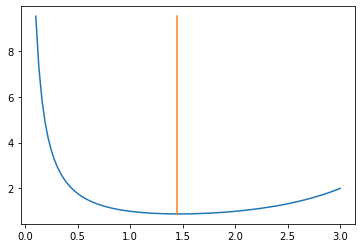

In [57]:
x=np.linspace(0.1,3,100)
y=np.array([math.gamma(i)for i in x])
plt.plot(x,y)
ind=np.argmin(y)
plt.plot([x[ind],x[ind]],[np.min(y),np.max(y)])

In [64]:
def find_min(fun,f,t,eps):
    # 三分法求函数极小值
    while f+eps<t:
        dis=(t-f)/3
        fm=f+dis
        tm=t-dis
        fv=fun(fm)
        tv=fun(tm)
        if fv<tv:
            # 谁大谁就移动
            t=tm
        else:
            f=fm
    return f
min_value=find_min(math.gamma,0.1,3,1e-10)
min_value

1.4616321505432632

In [65]:
# 这个数字除以pi和e的和近似为1
min_value/math.pi,min_value/math.e

(0.4652519634819953, 0.5377044187400691)

In [66]:
min_value/math.pi+min_value/math.e

1.0029563822220644

In [69]:
# 黄金分割比
(5**0.5-1)/2

0.6180339887498949

In [40]:
#tau是2pi是一个常数
math.tau==2*math.pi

True

In [33]:
math.hypot(3,4)# hypot(x,y)=x^2+y^2

5.0

In [23]:
math.copysign(4,-5)

-4.0

In [26]:
# trunc：向0取整
math.trunc(3.8),math.trunc(-3.8)

(3, -3)

In [16]:
math.inf,math.nan

(inf, nan)